In [17]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-2x+5$ en $\left[0,3\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,3\right]$:

In [3]:
x=sym.var('x')
def f(x):
  return x**2-2*x+5
f(x)

x**2 - 2*x + 5

In [4]:
df=sym.diff(f(x))
c=sym.solve(df,x)
c

[1]

In [7]:
puntos=np.array([0,1,3]) #puntos a evaluar

In [10]:
f(puntos) #como c=1, el punto crítico (c) por ser el más pequeño es un mínimo

array([5, 4, 8])

### Actividad
Determinar los valores extremos absolutos de  $f(x) = (x-3)^2(x+3)^2$ en el intervalo $[1,\,4]$, usando `sympy`. Mostrar en una gráfica.

In [12]:
def f(x):
  return (x-3)**2*(x+3)**2
f(x)

(x - 3)**2*(x + 3)**2

In [14]:
df=f(x).diff()
c=sym.solve(df,x)
c #de ellos, sólo 3 está dentro del dominio [1,4], por lo que lo utilizo: c(2)

[-3, 0, 3]

In [15]:
puntos=np.array([1,c[2],4])
f(puntos)

array([64, 0, 49], dtype=object)

In [16]:
x_n=np.linspace(0,5,400) #rango de números para graficar
y_n=f(x_n)

Text(-3, 5, '(-3,0)')

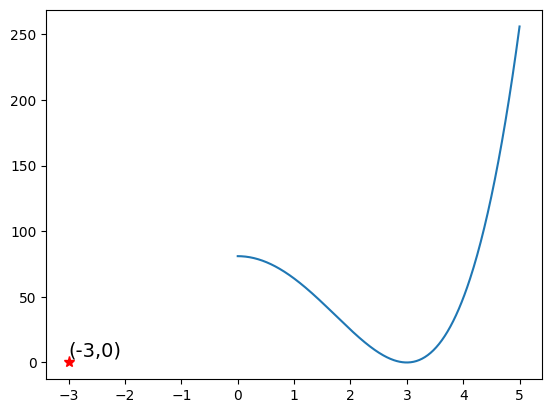

In [20]:
plt.plot(x_n,y_n)
plt.plot(c[0],f(c[0]),'r*',ms=8)
plt.text(c[0],f(c[0])+5, f'({c[0]},{f(c[0])})', fontsize =14)

### Cambio de librerías
Uso de funciones entre librerías `NumPy` y `SymPy`

$$
f(x)=e^{-x}\cos(2x),
$$
para $x\in[-1,1]$.

In [21]:
#Definimos F como una variable y sin utilizar el entorno 'def'
x=sym.var('x')
f=sym.exp(-x)*sym.cos(2*x) #Usamos funciones exponencial y coseno de SymPy
f

exp(-x)*cos(2*x)

In [22]:
#derivamos:
df=f.diff()
df

-2*exp(-x)*sin(2*x) - exp(-x)*cos(2*x)

In [24]:
#Buscar puntos críticos:
c=sym.solve(df,x)
c[0],float(c[0]) #convertimos el punto crítico a flotante

(-atan(1/2)/2, -0.23182380450040305)

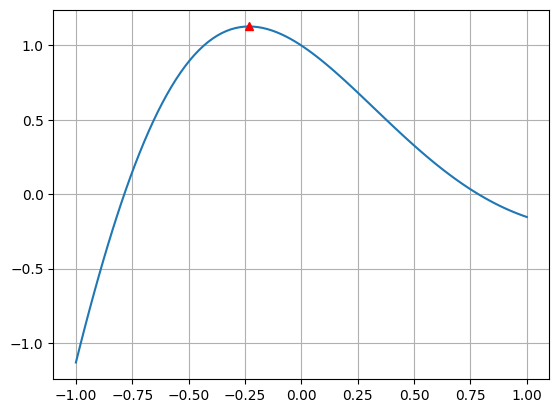

In [25]:
#Graficamos
#Para eso, convertimos la variable simbólica 'f' a una función que acepte arreglos de NumPy
f_num=sym.lambdify(x,f,'numpy')

x_num=np.linspace(-1,1,100)
y_num=f_num(x_num)
plt.plot(x_num,y_num)
plt.plot(float(c[0]),f_num(float(c[0])),'r^') #convertimos el punto crítico a float
plt.grid()

In [26]:
#Usamos funciones de NumPy
def f(x):
  return np.exp(-x)*np.cos(2*x)

``` python
 sym.diff(f(x),x) #Esto marca error
 ```

### Otra función a optimizar (con puntos críticos complejos)
$$
f(x)=(x^2+1)^2(x-1)^2
$$

In [28]:
#Como f(x)está expresado en potencias, nos conviene usar el entorno 'def'
def f(x):
  return (x**2+1)**2*(x-1)**2

f(x)

(x - 1)**2*(x**2 + 1)**2

In [29]:
#Buscamos puntos críticos
df=sym.diff(f(x),x)
c=sym.solve(df,x)
c

[1, -I, I, 1/3 - sqrt(2)*I/3, 1/3 + sqrt(2)*I/3]

In [32]:
x=sym.var('x',real=True) #definimos la variable simbólica, sólo con números reales
df=sym.diff(f(x),x)
c=sym.solve(df,x)  #Así encuentro los puntos críticos reales
c

[1]

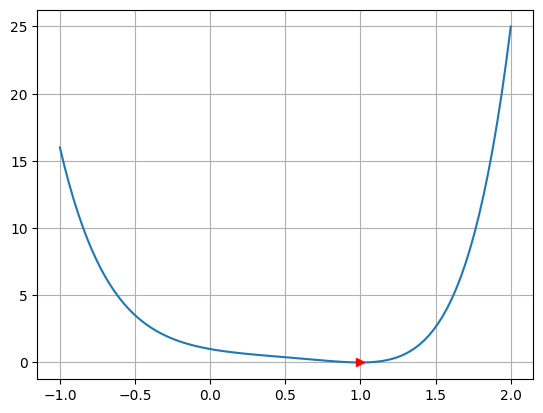

In [35]:
x_num=np.linspace(-1,2,100)
plt.plot(x_num,f(x_num))
plt.plot(c[0],f(c[0]),'r>')
plt.grid()

In [37]:
#Observando la gráfica puedo concluir que x=1 es un mínimo de f(x)
f(c[0])

0

---
1. **Resistencia de una viga**  Una viga de madera tiene una sección transversal rectangular de altura $h$ y ancho $w$. La resistencia $S$ de la viga es directamente proporcional al ancho y al cuadrado de su altura ($S=kwh^2$, donde $k$ es una constante de proporcionalidad). ¿Cuáles son las dimensiones de la viga más fuerte que puede cortarse a partir de un leño redondo de $24$ pulgadas de diámetro?

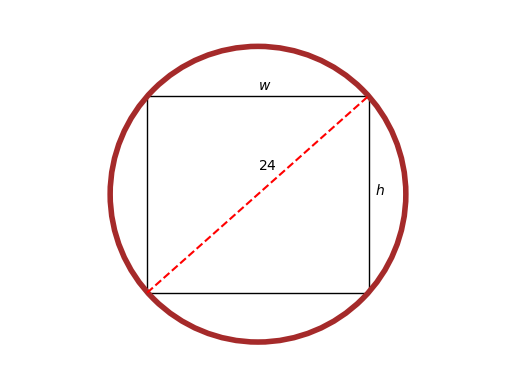

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C = patches.Circle((0, 0),12, fill=False,color='brown',lw=4)
S = patches.Rectangle((-9,-8),18,16,fill=False,color='k')
ax = plt.gca()
ax.add_artist(S)
ax.add_artist(C)

plt.text(0,8.5,'$w$')
plt.text(9.5,0,'$h$')

plt.plot([-9,9],[-8,8],'r--')
plt.text(0,2,'$24$')

plt.axis('equal')
plt.ylim([-15,15])
plt.axis('off')
plt.show()

In [40]:
#Maximizar S=kwh**2
#Son dos variables: w y h
#Observo que w y h forman un triángulo de hipotenusa=24
# 24**2=h^2+w^2
#h^2=24**2-w^2

$$ \max_{w}S(W)=\max_ww(24^2-w^2), $$
para $w$ positivo y $<24$.

In [41]:
k=1.3e4
def S(w):
  return k*w*(24**2-w**2)
w=sym.var('w',positive=True)
S(w)

13000.0*w*(576 - w**2)

In [42]:
dS=sym.diff(S(w),w)
c=sym.solve(dS,w)
c

[13.8564064605510]

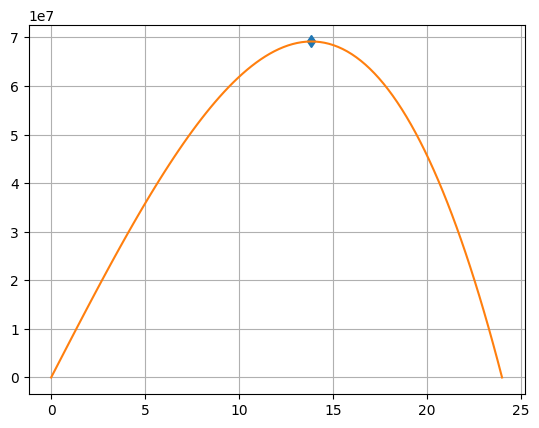

In [44]:
plt.plot(c[0],S(c[0]),'d')
w_num=np.linspace(0,24,100)
plt.plot(w_num,S(w_num))
plt.grid()

In [45]:
#Calculamos la altura
(24**2-c[0]**2)**0.5 #Teorema de Pitágoras

19.5959179422654

In [46]:
#Resistencia máxima obtenida
S(c[0])

69171181.0510707

**Resultado:**

Las dimensiones óptimas son $w=13.8564$ y $h=19.5959$ pulgadas, obreniendo una resistencia máxima de $69171181$ unidades de resistencia.

---